# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [12]:
# Your code here.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

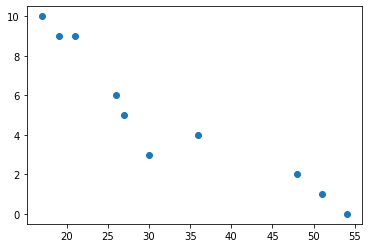

In [19]:
# Your code here.
plt.scatter(student_data['Age'],student_data['Tardies'])
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [7]:
# Your response here. 
#We can agree that the older you are, the less often the student are late for class

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [21]:
# Your response here.
#correlation:
print(student_data['Age'].corr(student_data['Tardies']))
#We can see here that is strongly negatively correlated. As age increases, the tardies decreases 

#covariance:
print(np.cov(student_data['Age'],student_data['Tardies']))
#We can see the same thing with the covariance. We can see that they are negatively correlated. (-45)

-0.9391626886887122
[[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [22]:
# Your response here.
model = linear_model.LinearRegression()
result = model.fit(student_data[['Age']],student_data['Tardies'])

Plot your regression model on your scatter plot.

In [24]:
# Your code here.
regression_line = result.intercept_ + result.coef_[0]*student_data[['Age']]

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

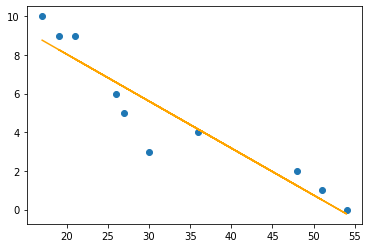

In [25]:
# Your response here. 
plt.plot(student_data[['Age']], regression_line, c = 'orange')
plt.scatter(student_data[['Age']],student_data['Tardies'])
plt.show()
#As we can see from the regression line, we can only conclude that the hypotheses was correct.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [123]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [124]:
# Your response here. 
x = vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

for i in x.columns:
    print(i +" correlation -> "+ str(x[i].corr(y)))

#Fuel Barrels/Year and Fuel Cost/Year is the principal variable to analyse CO2 Emission Grams/Mile.
#Makes sense because these two variables depend in each other.

Year correlation -> -0.22229960295054238
Cylinders correlation -> 0.7523925537297486
Fuel Barrels/Year correlation -> 0.9861886621428727
Combined MPG correlation -> -0.9262290389336445
Fuel Cost/Year correlation -> 0.9308651512201844


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

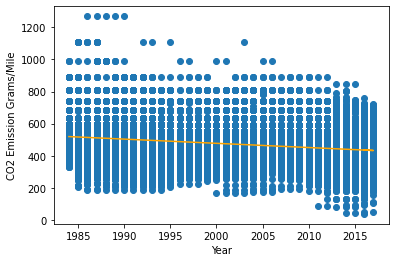

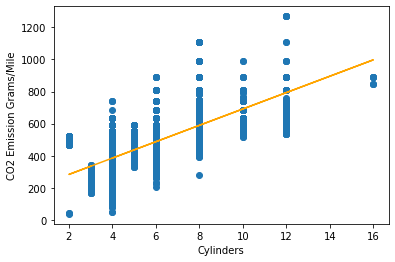

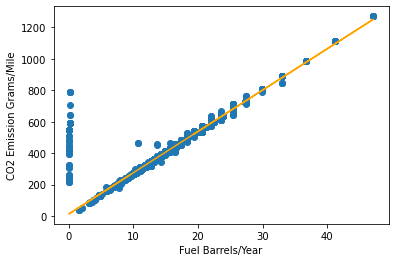

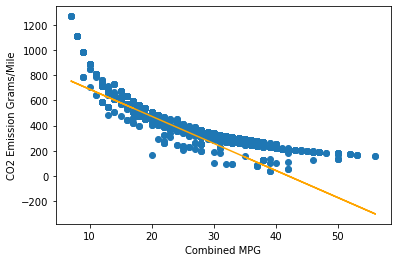

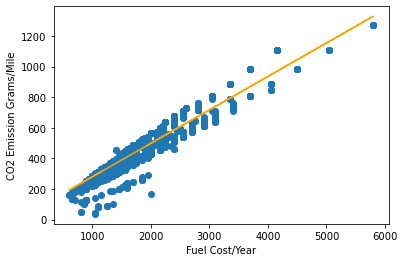

In [125]:
# Your response here.

for i in x.columns:
    model = linear_model.LinearRegression()
    result = model.fit(x[[i]],y)
    regression_line = result.intercept_ + result.coef_[0]*x[i]
    plt.plot(x[[i]], regression_line, c = 'orange')
    plt.scatter(x[[i]],y)
    plt.xlabel(i)
    plt.ylabel('CO2 Emission Grams/Mile')
    plt.show()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [128]:
# Your response here. 
import statsmodels.api as sm

for i in x.columns:
    model = sm.OLS(y, x[[i]])
    result = model.fit()
    print(result.summary())

                                   OLS Regression Results                                   
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.940
Model:                                 OLS   Adj. R-squared (uncentered):              0.940
Method:                      Least Squares   F-statistic:                          5.674e+05
Date:                     Sun, 07 Feb 2021   Prob (F-statistic):                        0.00
Time:                             20:20:49   Log-Likelihood:                     -2.2302e+05
No. Observations:                    35952   AIC:                                  4.460e+05
Df Residuals:                        35951   BIC:                                  4.460e+05
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025    

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [61]:
# Your code here.
data = pd.DataFrame({'x' : [1,3,4,6,8,9,11,14], 'y' : [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

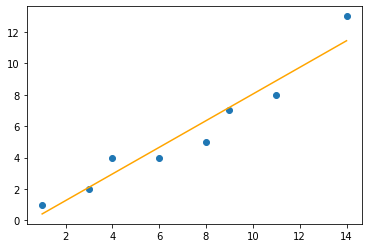

In [65]:
# Your code here.
x = data[['x']]
y = data['y']

model = linear_model.LinearRegression()
result = model.fit(x,y)
regression_line = result.intercept_ + result.coef_[0]*x

plt.plot(x,regression_line, c='orange')
plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [67]:
# Your response here. 
#We can see that the suspicious might be correct. The more I invite, the lesse people appear.

data['x'].corr(data['y'])

0.9652303546573691

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [121]:
# Your response here. 


x_q1 = np.quantile(data['x'], 0.25)
x_q3 = np.quantile(data['x'], 0.75)
y_q1 = np.quantile(data['y'], 0.25)
y_q3 = np.quantile(data['y'], 0.75)

iqr_x = x_q3 - x_q1
iqr_y = y_q3 - y_q1
out_x_max= x_q3 + 1.5*iqr_x
out_x_min = x_q1 - 1.5*iqr_x
out_y_max = y_q3 + 1.5*iqr_y
out_y_min = y_q1 - 1.5*iqr_y


print(data['x'] > out_x_max, data['x'] < out_x_min, data['y'] > out_y_max, data['y'] < out_y_min)
# no outliers according to https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
Name: x, dtype: bool 0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
Name: x, dtype: bool 0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
Name: y, dtype: bool 0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
Name: y, dtype: bool


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
# There were no outliers, but if it exists, the correlation formula would be closer to one which means the more people we invite the less people will appear.